Exploratory Data Analysis (EDA)
===

Author: Nathan A. Mahynski
    
Date: 2023/08/28
    
Description: Examples of initial and exploratory data anlaysis approaches and tools.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mahynski/pychemauth/blob/main/docs/jupyter/api/eda.ipynb)

In [ ]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/mahynski/pychemauth@main
    import os
    os.kill(os.getpid(), 9) # Automatically restart the runtime to reload libraries

In [ ]:
if 'google.colab' in str(get_ipython()):
    !pip install dtale

    import dtale.app as dtale_app
    dtale_app.USE_COLAB = True
else:
    import dtale as dtale_app

try:
    import pychemauth
except:
    raise ImportError("pychemauth not installed")

import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import watermark
%load_ext watermark

%load_ext autoreload
%autoreload 2

In [ ]:
%watermark -t -m -v --iversions

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.14.0

Compiler    : GCC 12.2.0
OS          : Linux
Release     : 6.2.0-34-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 40
Architecture: 64bit

watermark : 2.4.3
numpy     : 1.24.3
json      : 2.0.9
pychemauth: 0.0.0b3
matplotlib: 3.7.2
pandas    : 1.5.3
missingno : 0.5.2
dtale     : 3.3.0



In [ ]:
# Let's create some synthetic data
from sklearn.datasets import make_classification

clf_X, clf_y = make_classification(
    n_samples=100,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_repeated=1,
    n_classes=3,
    n_clusters_per_class=1,
    shuffle=True,
    random_state=42
)

n_delete = 50

np.random.seed(42)
row_idx = [np.random.randint(low=0, high=clf_X.shape[0])
     for i in range(n_delete)]
col_idx = [np.random.randint(low=0, high=clf_X.shape[1])
     for i in range(n_delete)]

for i,j in zip(row_idx, col_idx):
    clf_X[i,j] = np.nan

clf_X[20:30,7:14] = np.nan

clf_X = np.hstack((clf_X, np.zeros(clf_X.shape[0]).reshape(-1,1) ))

clf_df = pd.DataFrame(
    data=np.hstack((clf_y.reshape(-1,1), clf_X)),
    columns=['Y']+['X{}'.format(i) for i in range(clf_X.shape[1])]
)

Data Cleaning
---

Data is almost always polluted with missing values, corrupted values, and other mistakes.  

<h3>Visual Inspection</h3>

> "[D-Tale](https://github.com/man-group/dtale) is the combination of a Flask back-end and a React front-end to bring you an easy way to view & analyze Pandas data structures. It integrates seamlessly with ipython notebooks & python/ipython terminals. Currently this tool supports such Pandas objects as DataFrame, Series, MultiIndex, DatetimeIndex & RangeIndex."

Some things to try:

* Click on the header to get a description of the rows, types, skew, outliers, etc.

* Select 'Filter outliers' at the bottom of the pop-up to remove rows that are considered outliers.

* Click 'Describe' to see descriptive statistics - also check out the histograms and Q-Q plot!

* View Duplicates.

* Convert the column type.

* Select 'Heat Map' to highlight rows based on values.

* Use 'Replacements' to replace NaN, etc. using various tools including sklearn imputers.

* Use filters at the bottom to filter rows based on criteria; click on the icon to get a pop-up that lets you build more complex criteria!

* Double click on a row to change the value!

* Under the '>' icon in the top left, select 'Clean Columns' to explore options to clean data.

* Under the '>' icon in the top left, select 'Feature Analysis by Correlation' to see how columns are correlated with one another.

* Under the '>' icon in the top left, select 'Charts' to make various plots of features against each other.

* D-Tale is also "smart" about inferring things from your column labels. For example, if you look at the Describe options for Latitude or Longitude, it will detect the other and give a "Geolocation" option. Try it out!

Check out Animations under different types of Charts!

In [ ]:
dtale_app.show(clf_df)

<h2>Missing Values</h2>

Probably the most common issue is missing entries.

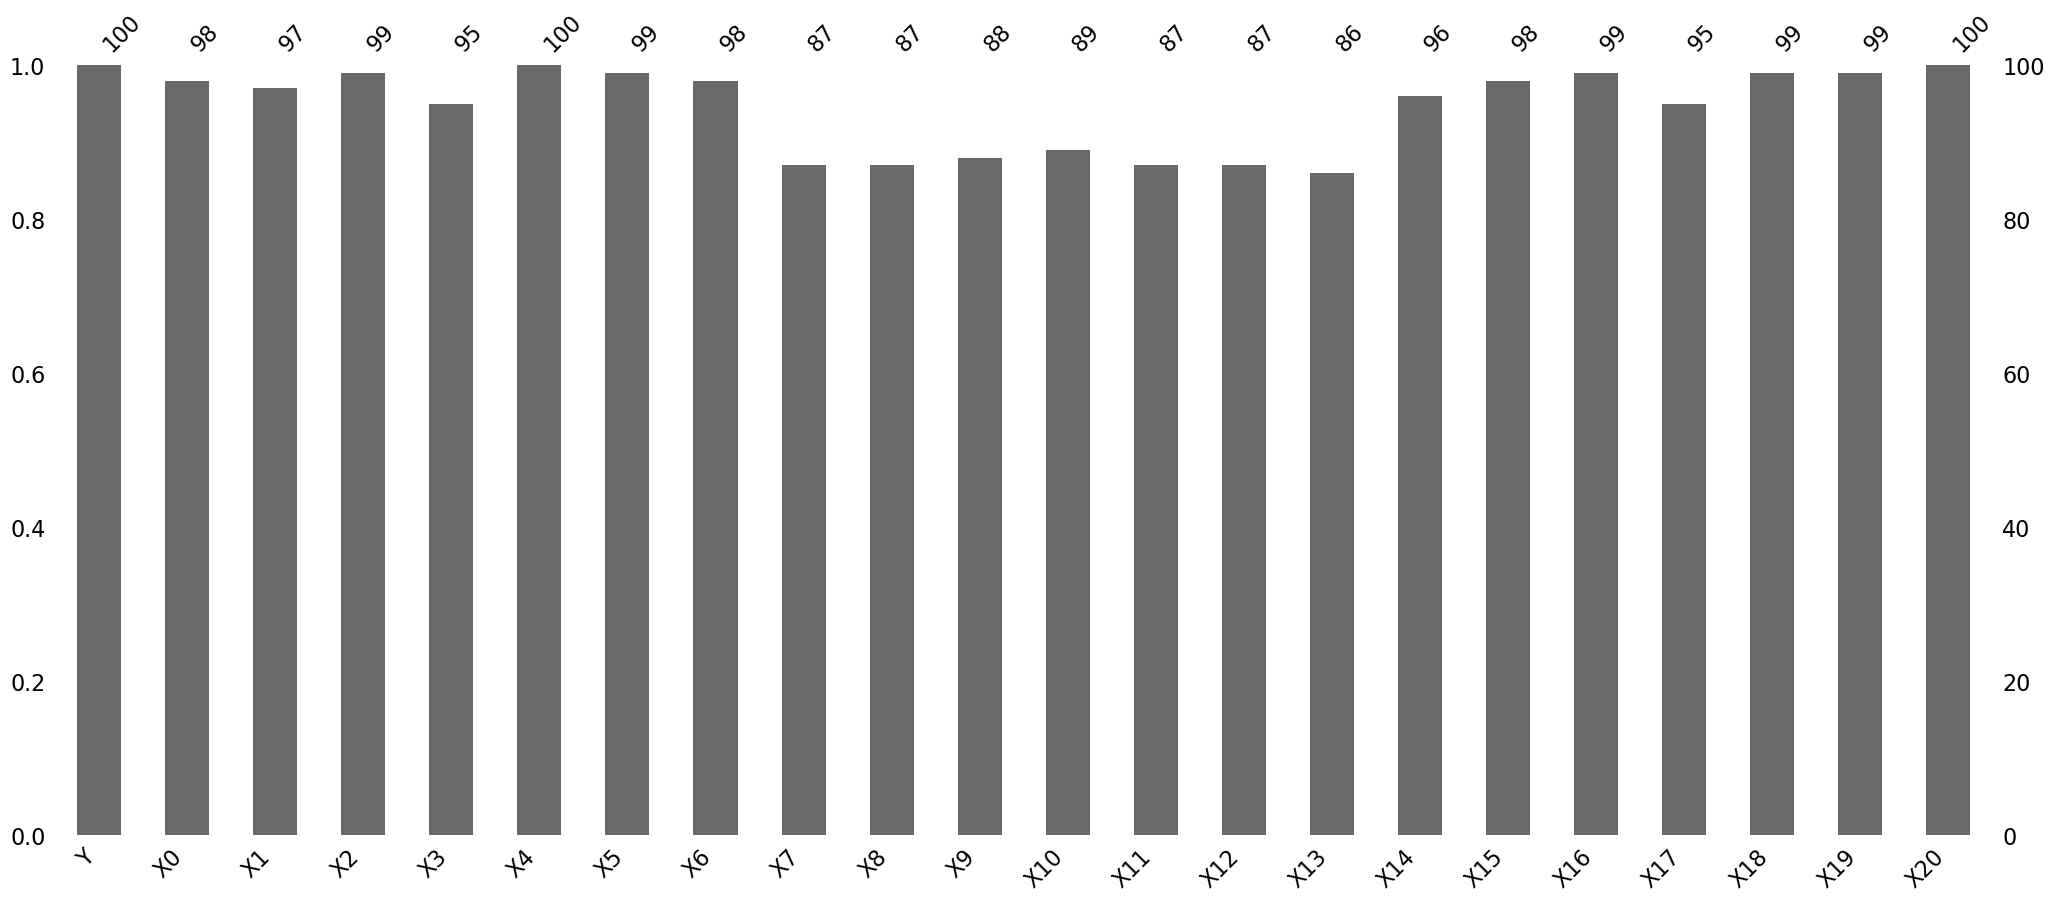

In [ ]:
# You can make a nice visual summary with the missingno package.
_ = msno.bar(clf_df)

In [ ]:
# You can get similar information easily from pandas.
clf_df.describe()

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
count,100.000000,98.000000,97.000000,99.000000,95.000000,100.000000,99.000000,98.000000,87.000000,87.000000,...,87.000000,87.000000,86.000000,96.000000,98.000000,99.000000,95.000000,99.000000,99.000000,100.0
mean,0.980000,0.416744,0.550003,-0.409867,0.469868,0.480803,0.171988,0.311090,-0.255184,0.499152,...,-0.046796,0.293947,-0.161045,0.100877,0.619423,0.504714,-0.311486,-0.028739,-0.197136,0.0
std,0.828532,1.865645,1.945531,2.017779,1.911788,2.379489,2.339667,2.060292,2.213457,3.893434,...,0.990509,2.023762,1.087904,0.902127,3.754778,2.049922,2.064303,0.856101,2.388248,0.0
min,0.000000,-7.804984,-4.594066,-5.449833,-3.470138,-7.295433,-4.934581,-4.483776,-4.797259,-9.652620,...,-2.714107,-5.165044,-3.351611,-2.223612,-8.559591,-4.387762,-6.879669,-2.433902,-6.650512,0.0
25%,0.000000,-0.768770,-0.642864,-1.702701,-0.933827,-1.432820,-1.537453,-1.090340,-1.575067,-2.526275,...,-0.572619,-0.800061,-0.912407,-0.460009,-1.830449,-1.050903,-1.615511,-0.647242,-1.495237,0.0
50%,1.000000,0.654031,0.550894,-0.553521,0.366871,0.653670,0.169688,-0.006360,-0.361892,0.956726,...,-0.013385,0.517110,-0.123958,0.114135,0.499928,0.676208,-0.442491,0.072378,-0.234350,0.0
75%,2.000000,1.713553,1.945899,0.716697,2.144638,2.437314,1.910158,1.691740,1.102648,2.337104,...,0.656189,1.510431,0.622118,0.710672,3.148292,2.119313,0.748131,0.502437,1.436241,0.0
max,2.000000,4.430502,6.975935,5.757441,4.583384,6.162362,5.589560,5.518962,4.577893,11.124628,...,2.128947,5.537396,2.699714,2.042985,11.280467,6.387377,4.860287,2.191907,5.514474,0.0


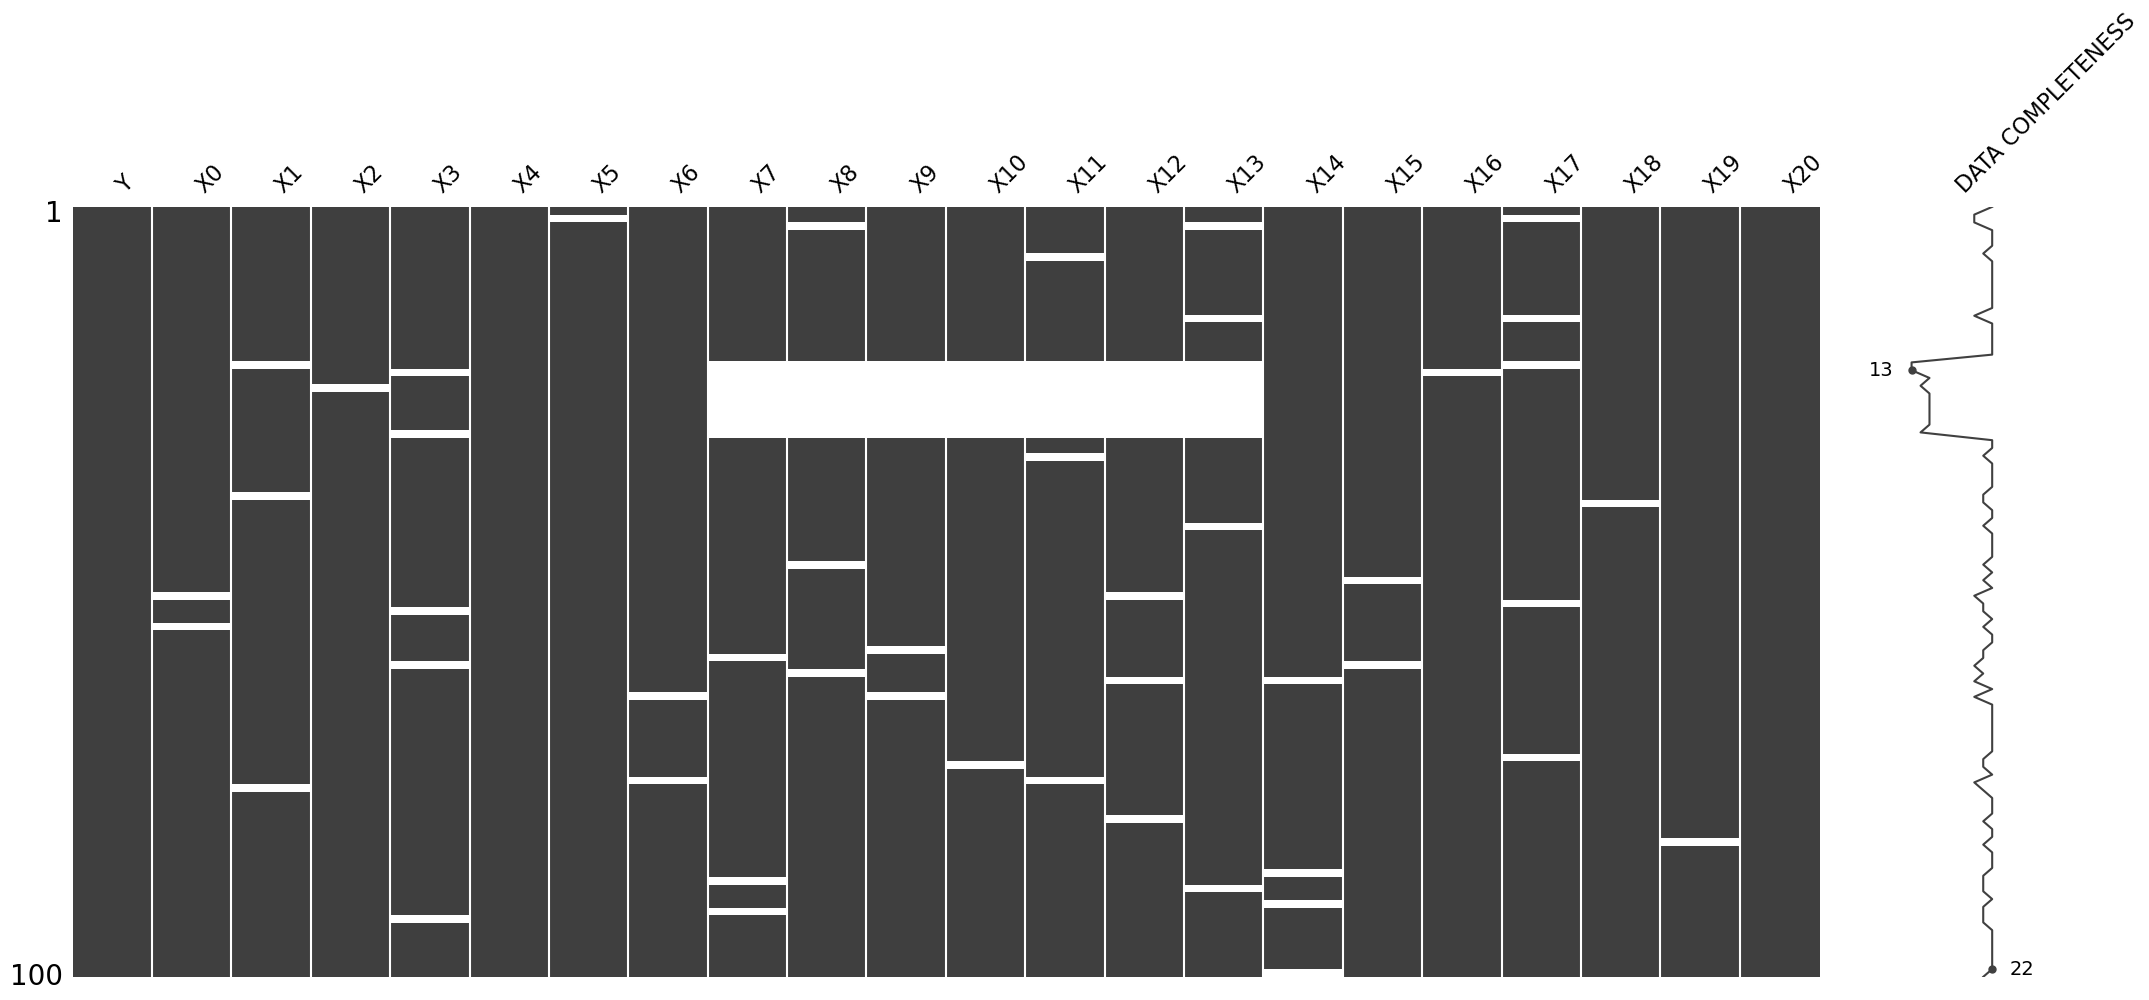

In [ ]:
# The matrix view let's you see easily if there are "blocks" or other correlations between where missing values occur.
_ = msno.matrix(clf_df, labels=True)

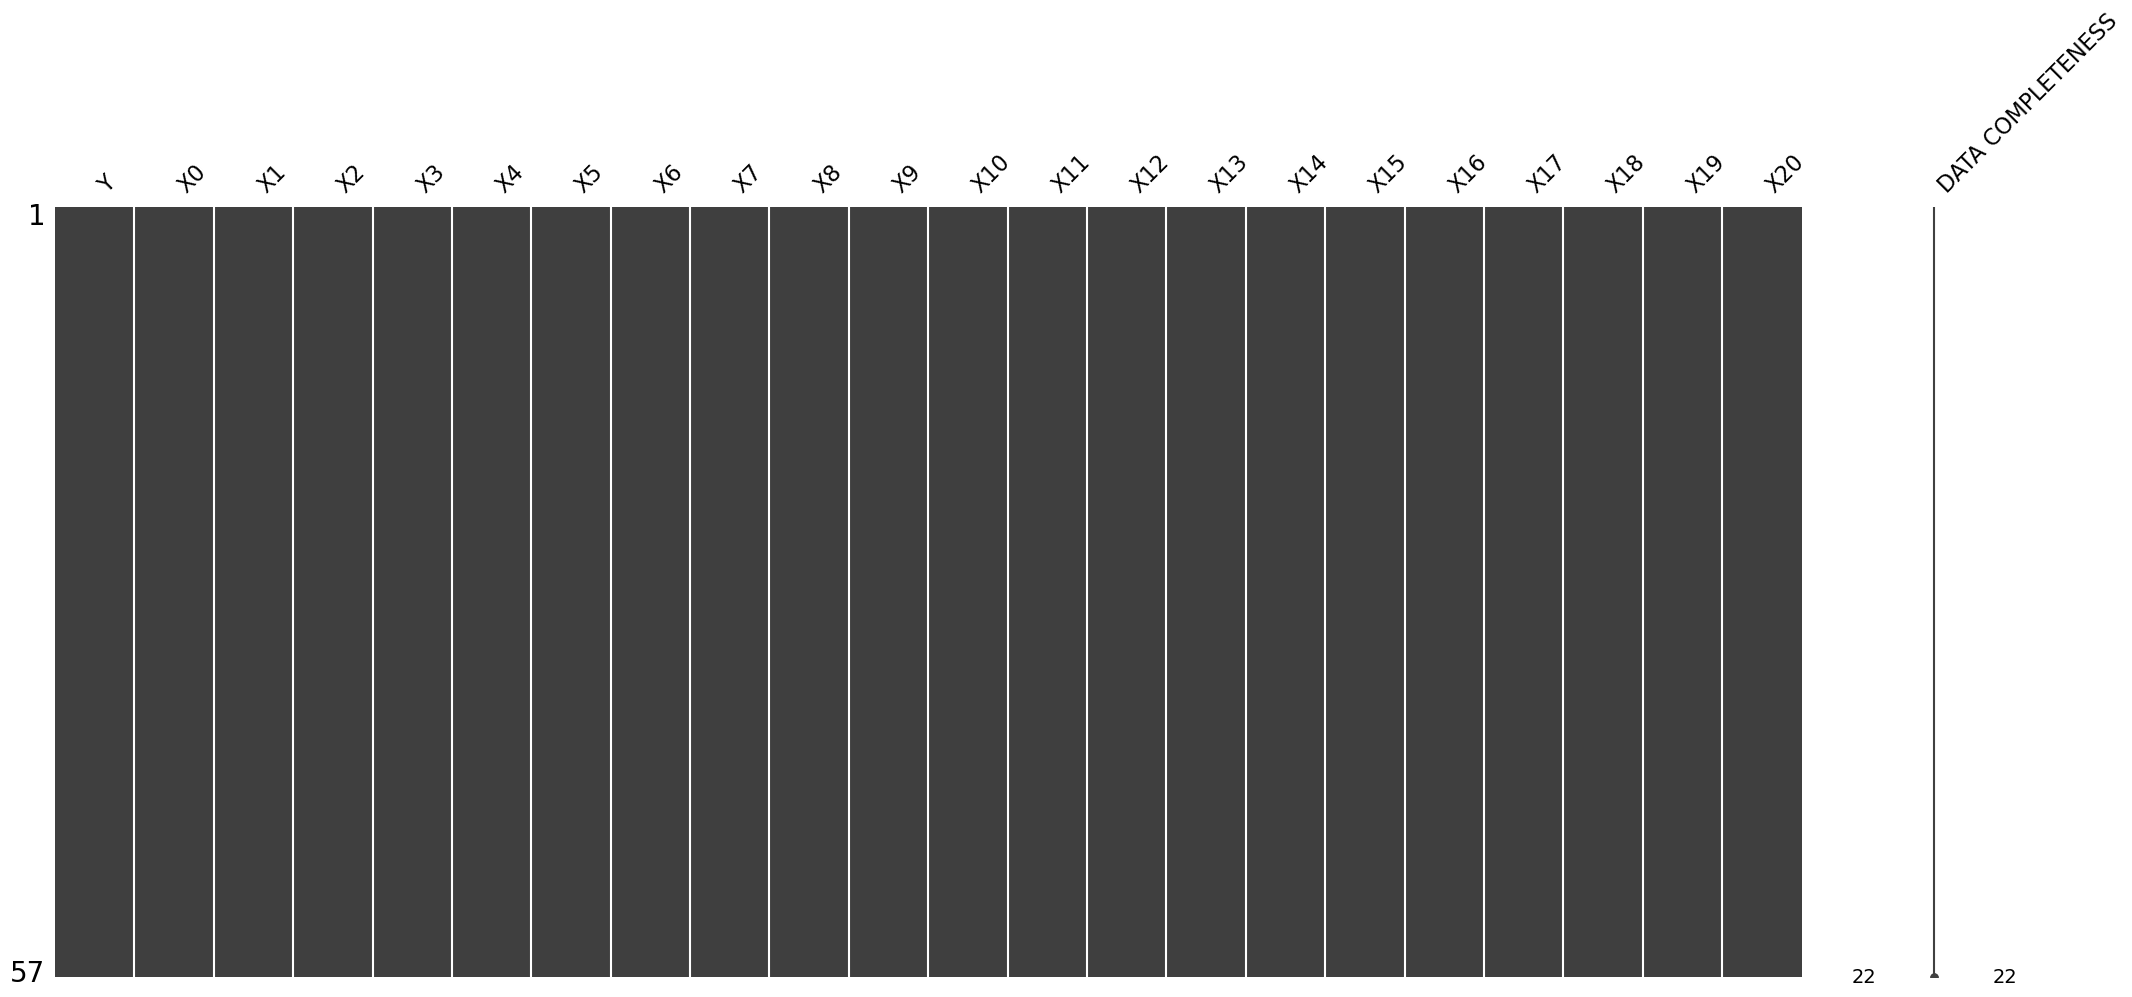

In [ ]:
# An extreme option is to just drop any row with any missing value
_ = msno.matrix(
    clf_df.dropna(axis='index', how='any'),
    labels=True
)

The other option is to leave these NaN values alone and use some [imputing tools](https://pychemauth.readthedocs.io/en/latest/jupyter/api/imputing.html) to fill in the gaps.

<h2>Other Integrity Issues</h2>

In [ ]:
from pychemauth.eda.screen import RedFlags

In [ ]:
r = RedFlags(tag="Some note to display in the warning")
r.all_checks.keys()

dict_keys(['check_duplicates', 'check_inf', 'check_min_different_values', 'check_min_observations', 'check_nan', 'check_zero_class_variance', 'check_zero_variance'])

This class will run a check for some basic issues that can crop up and create numerical problems later on.

* check_duplicates - Check if any rows in X are duplicates numerically.
* check_inf - Check if any entries in X or y are Inf.
* check_min_different_values - Check each class has a minimum number of unique values in each column of X (default is 5).
* check_min_observations - Check each class has a minimum number of observations (default is 5).
* check_nan - Check if any entries in X or y are NaN.
* check_zero_variance - Check if any columns in X are constant (unsupervised). This can be a problem if you standardize your data later on since you will divide by the standard deviation which is 0 in this case.
* check_zero_class_variance - Check if columns in X are constant for any classes.

In [ ]:
df_ = clf_df.dropna()

# The 20th column is a constant number so various warnings end up getting raised.
r.run(
    X=df_.iloc[:,1:],
    y=df_.iloc[:,0]
)

/home/nam4/anaconda3/envs/oyster-provenance/lib/python3.11/site-packages/pychemauth/eda/screen.py:309: UserWarning:

Some note to display in the warning : Class 0.0 (n=19) only contains only 1 different observations for feature (column) index 20

/home/nam4/anaconda3/envs/oyster-provenance/lib/python3.11/site-packages/pychemauth/eda/screen.py:309: UserWarning:

Some note to display in the warning : Class 1.0 (n=14) only contains only 1 different observations for feature (column) index 20

/home/nam4/anaconda3/envs/oyster-provenance/lib/python3.11/site-packages/pychemauth/eda/screen.py:309: UserWarning:

Some note to display in the warning : Class 2.0 (n=24) only contains only 1 different observations for feature (column) index 20

/home/nam4/anaconda3/envs/oyster-provenance/lib/python3.11/site-packages/pychemauth/eda/screen.py:401: UserWarning:

Some note to display in the warning : X[0.0] contains columns with no variance: [20]

/home/nam4/anaconda3/envs/oyster-provenance/lib/python3.

In [ ]:
# Let's drop all the rows with any NaN value and the redundant X20 column which was purposefully created for this example.
no_nan = clf_df.dropna(axis=0, how='any')
no_nan = no_nan.drop('X20', axis=1)

Data Inspection
---

After the data has been cleaned it is important to look at basic trends to see if biases exist and what sort of hypotheses one might make about the data itself.

[DTale](https://github.com/man-group/dtale) has many tools that also help with data inspection, but here I will go over other tools we can script and automate.

In [ ]:
from pychemauth.eda.explore import InspectData

<h3>Data Distribution</h3>

It is important to understand if your data has outliers or other distributional quirks.

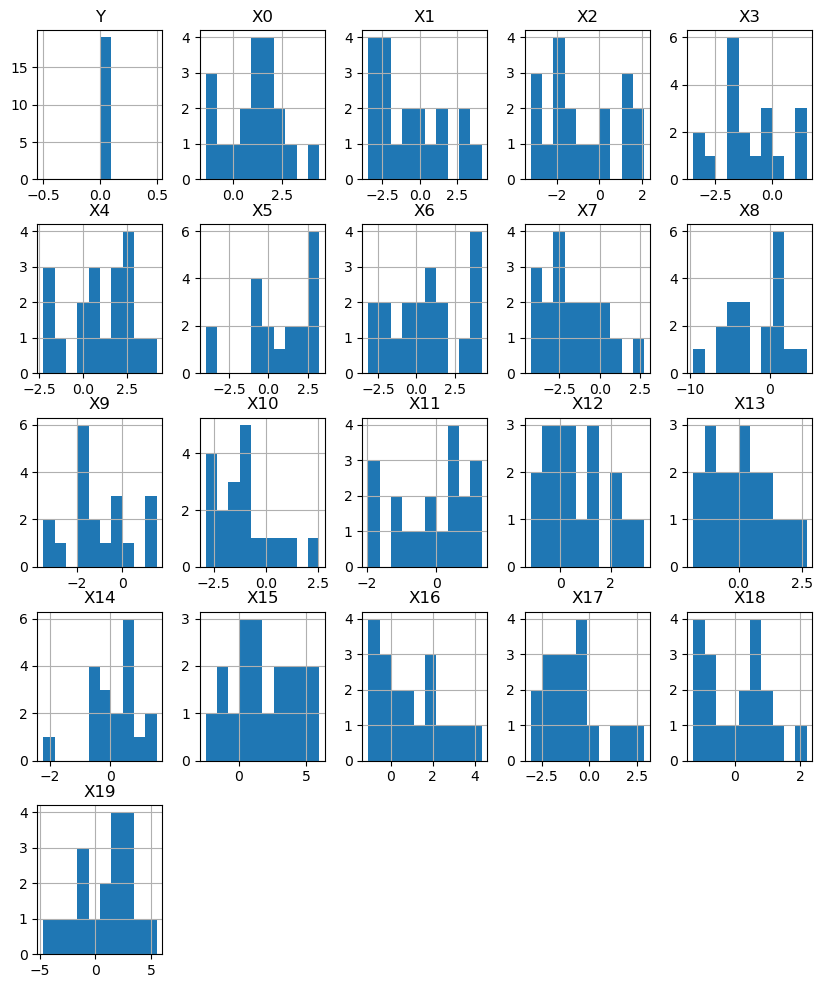

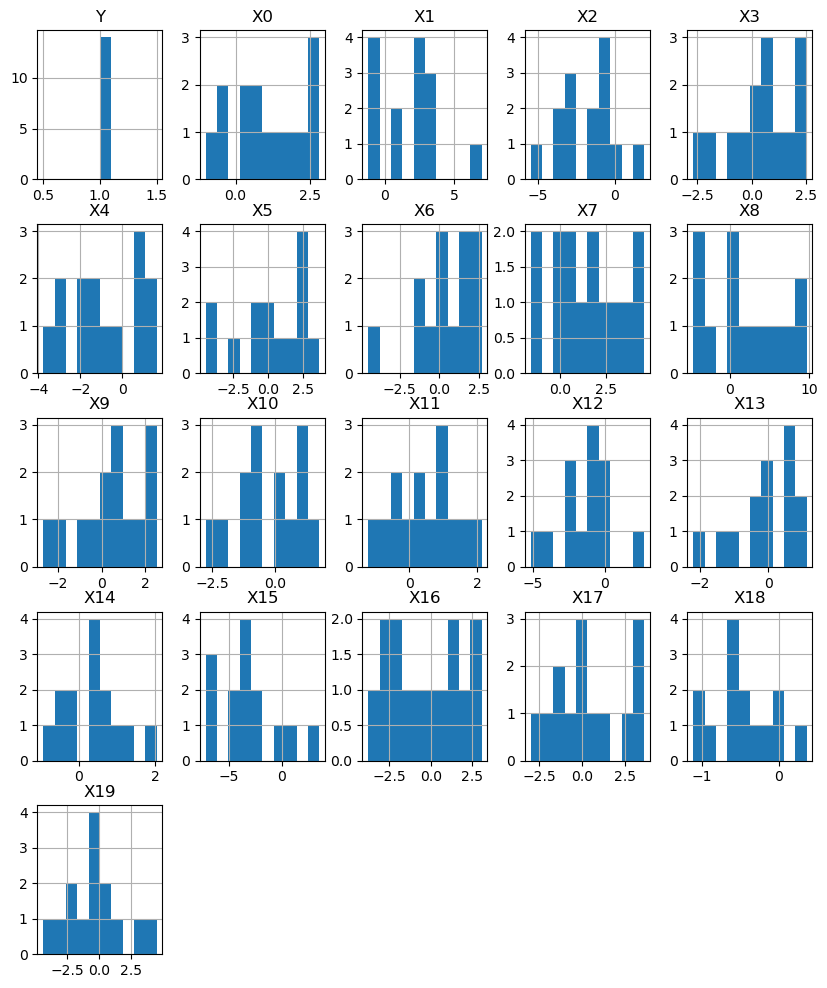

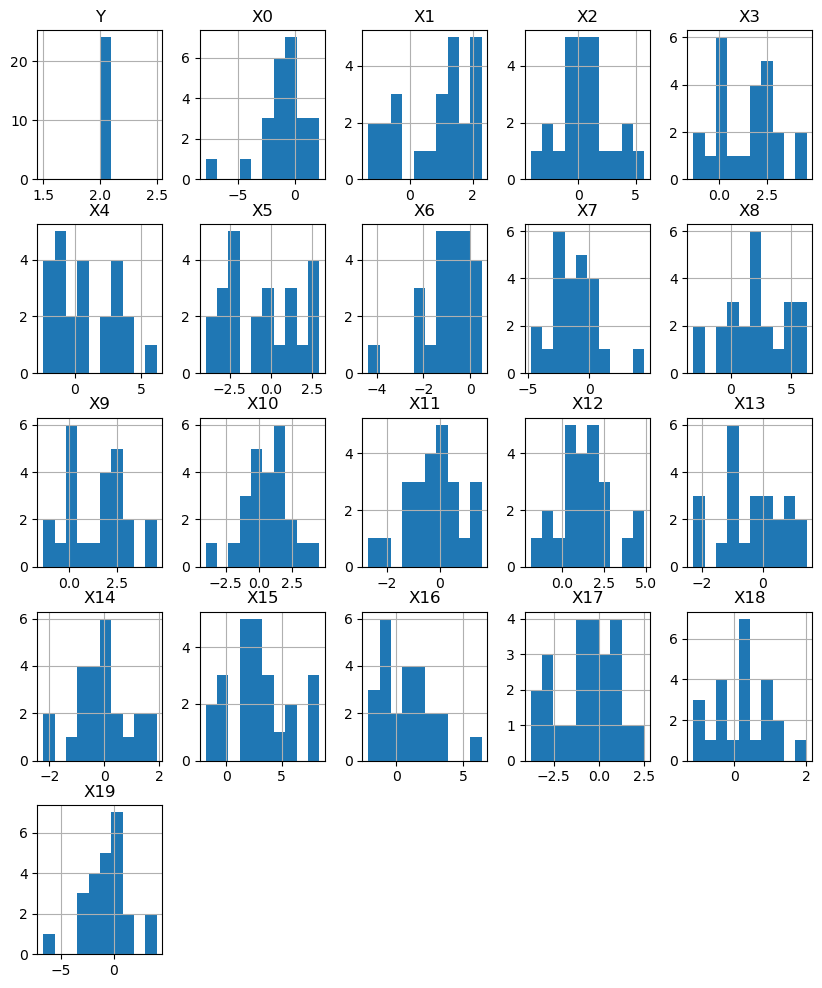

In [ ]:
# Pandas lets you easily make histograms to visualize how each variable is distributed.
# Here, we will do this by class to see if there is any skew on a class-by-class basis.
# You can do something similar with D-Tale, too.

class_group = no_nan.groupby('Y')
_ = class_group.hist(figsize=(10,12))

/home/nam4/anaconda3/envs/oyster-provenance/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



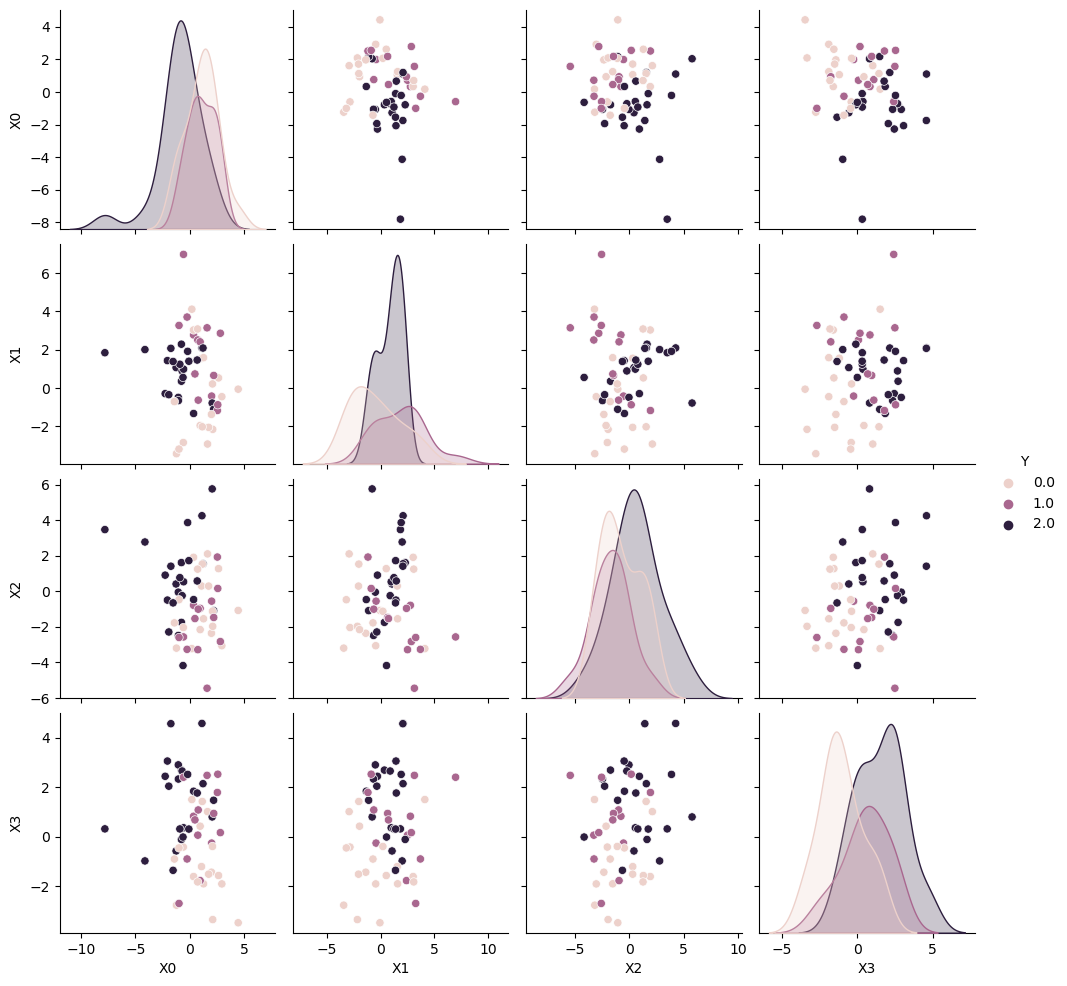

In [ ]:
# Pairplots help reveal pair-wise trends in your data, as well as correlations.
# Let's just look at the first 5 as an example.
InspectData.pairplot(no_nan, vars=no_nan.columns[1:5], hue="Y", diag_kind="kde")

In [ ]:
# Checking for class imbalance is very important in classification problems.
# Knowing this is important when deciding to use class-balancing or resampling methods in your future modeling pipeline.
for class_, count_ in zip(*np.unique(no_nan['Y'], return_counts=True)):
    print('Class {} has {} observations'.format(class_, count_))

Class 0.0 has 19 observations
Class 1.0 has 14 observations
Class 2.0 has 24 observations


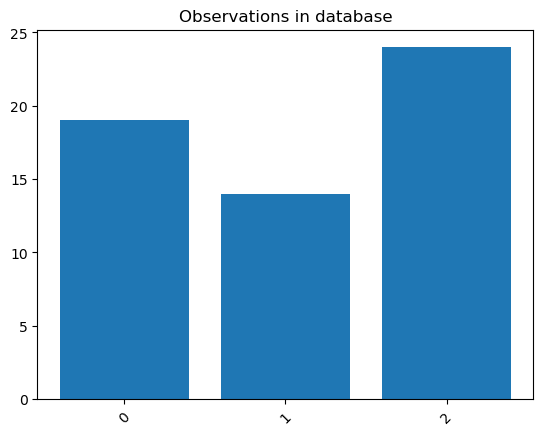

In [ ]:
plt.bar(
    x=no_nan['Y'].unique(),
    height=[np.sum(no_nan['Y']==class_) for class_ in no_nan['Y'].unique()]
)
plt.xticks([0, 1, 2])
plt.title('Observations in database')
_ = plt.xticks(rotation=45)

<h3>Outliers</h3>

Certain models may have ways to "clean" the data, but it can be helpful to know if we should expect any outliers to exist at this stage, too.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

X_ = no_nan.drop('Y', axis=1).values

clf = LocalOutlierFactor(
    n_neighbors=10,
    contamination=0.01, # Fraction of data expected to be outliers
)
y_pred = clf.fit_predict(X_)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(
    n_estimators=100,
    contamination=0.01, # Fraction of data expected to be outliers
    random_state=42
)
y_pred = clf.fit_predict(X_)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

<h3>Clustering</h3>

Clustering helps reveal the natural number of classes you might have (in an unsupervised way).  It can also be helpful in identifying biased sampling.

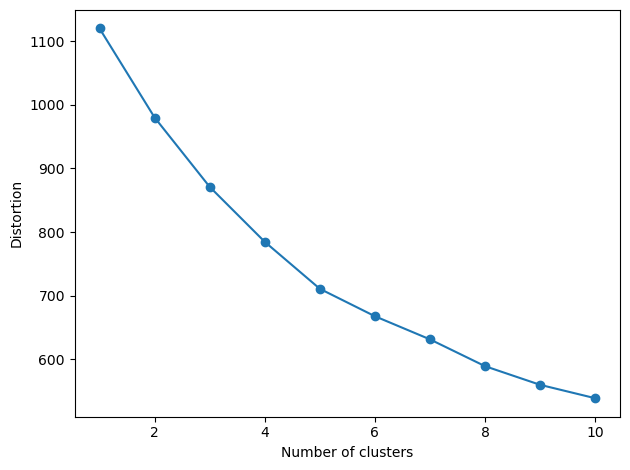

In [ ]:
from pychemauth.preprocessing.scaling import CorrectedScaler

scaler = CorrectedScaler()
X_ = scaler.fit_transform(no_nan.drop('Y', axis=1))
_ = InspectData.cluster_elbow(X_)

sklearn has a nice discussion about using [cluster silhouettes](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) to identify the number of clusters present in your data.

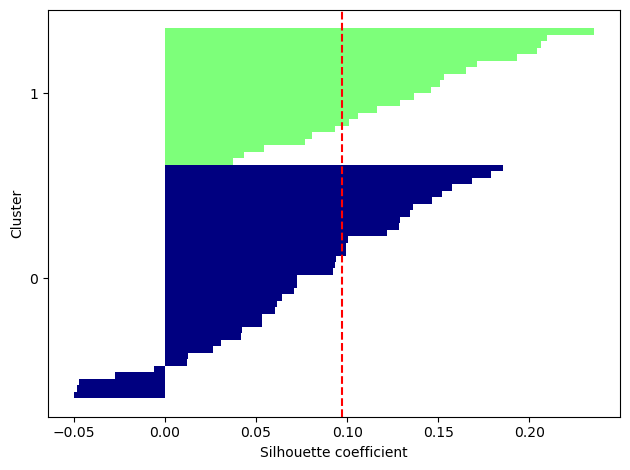

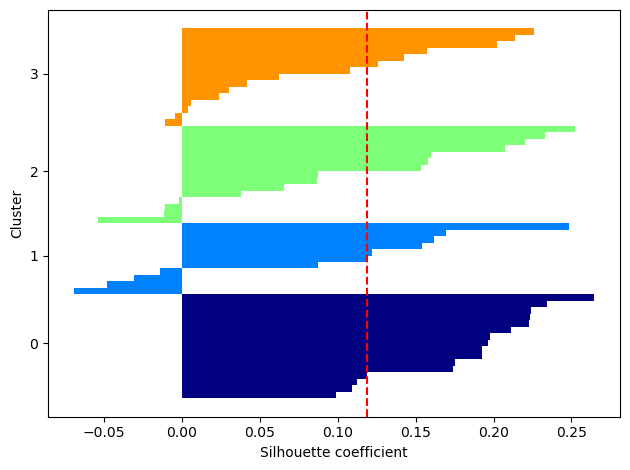

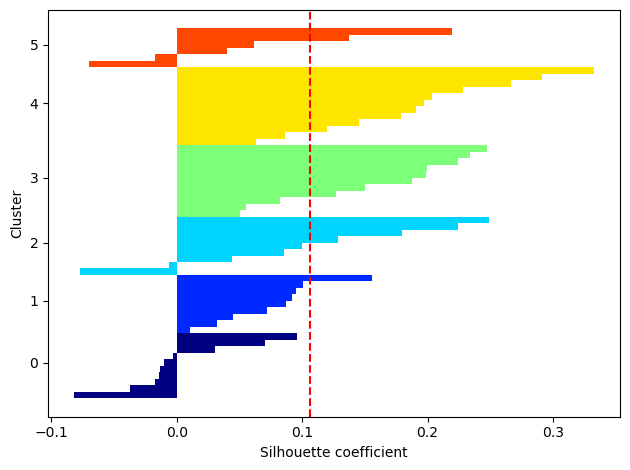

In [ ]:
from sklearn.cluster import KMeans
for n in [2, 4, 6]:
    plt.figure()
    _ = InspectData.cluster_silhouette(X_, KMeans(n_clusters=n, init="k-means++", n_init=5, random_state=42))

In [ ]:
from pychemauth.eda.screen import JSScreen

screen = JSScreen(
    n=2, # Only consider up to binary merges
    feature_names = no_nan.drop('Y', axis=1).columns,
    js_bins=10,
    robust=True
)

_ = screen.fit(X=no_nan.drop('Y', axis=1).values, y=no_nan['Y'].values)

100%|█████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.63it/s]


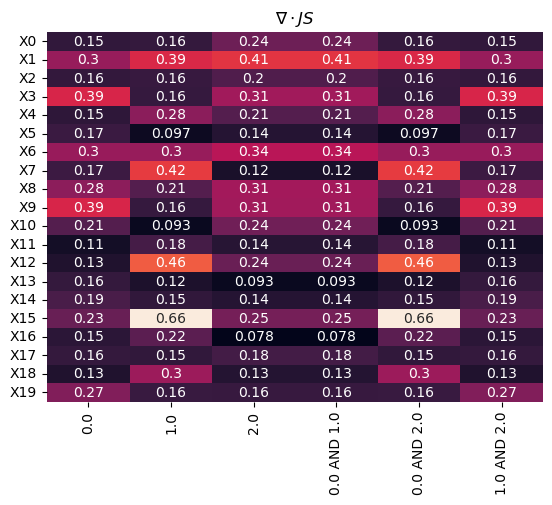

In [ ]:
_ = screen.visualize_grid() # Which features separate (macro)classes the best from others?

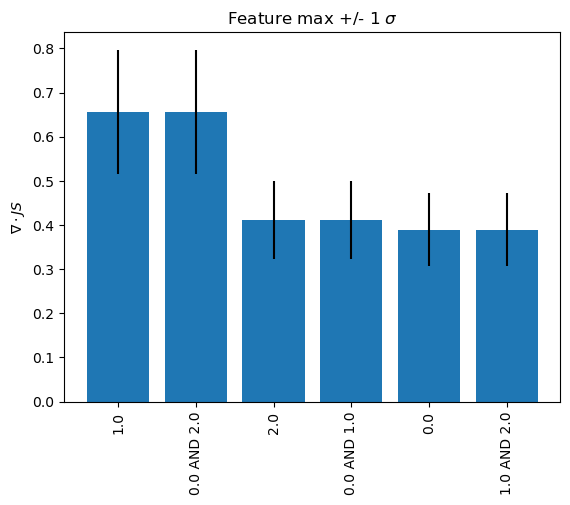

In [ ]:
_ = screen.visualize_classes()

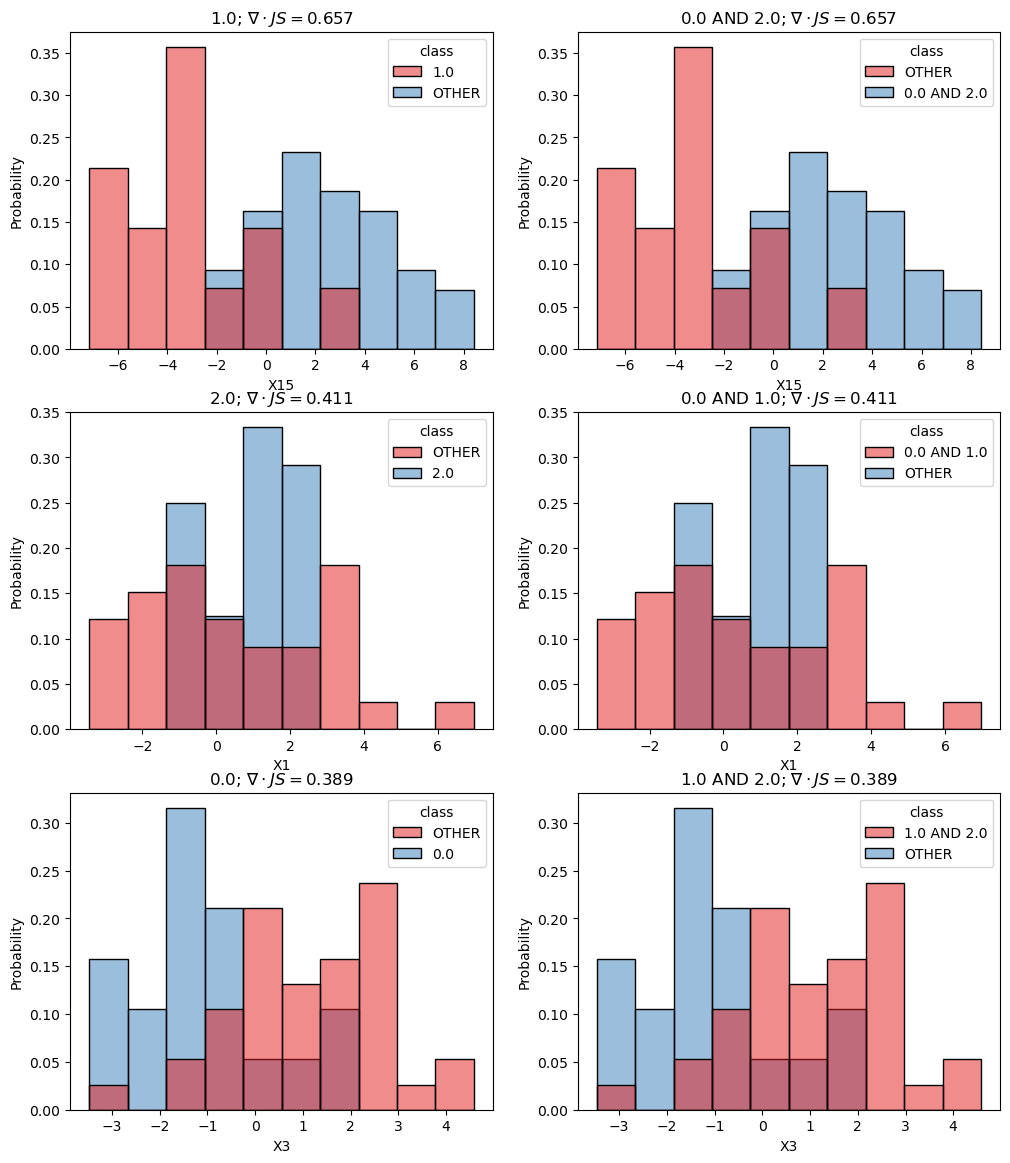

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,14))
_ = screen.visualize_max(bins=10, ax=axes) # Plot distribution of the feature which maximally separates (macro)classes

In [ ]:
interest, proposed_combinations = screen.interesting(0.5, method="max", min_delta=0.01)

In [ ]:
# Consider combining classes 0 and 2 into a single macroclass, which might be very similar
proposed_combinations

{0: {'0.0', '2.0'}}

<h3>Identifying Useful Features</h3>

[Jensen-Shannon Divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence) can be a useful tool to see what, if any, features easily separate classes.  Pairs of classes for which a feature with a high JSD (close to 1) exists can be separated easily using value(s) of the feature.  For example, two classes might be separated by a simple cutoff value, where class "A" tends to have a value above this, while class "B" tends to be below.  This can be particularly helpful when identify features to use in models such as decision trees.

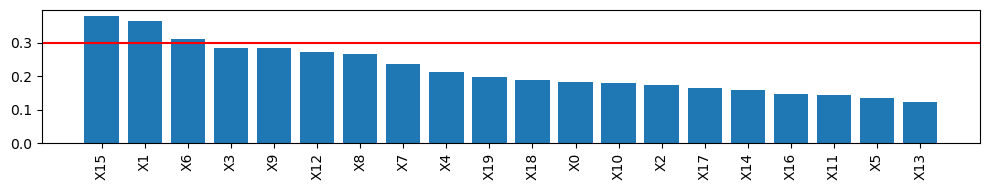

In [ ]:
# We can rank each feature based on the JSD when observations are labeled by their class.
# This helps pick out features for which each class has pseudo-unique values.

from pychemauth.preprocessing.feature_selection import JensenShannonDivergence

X_ = no_nan.drop('Y', axis=1)

js = JensenShannonDivergence(
    top_k=3, # Return this many top ranked (closest to 1) features.
    feature_names=X_.columns,
    per_class=False,
    bins=10,
    robust=True
)

_ = js.fit(X_, no_nan['Y'])

js.visualize(by_class=False, threshold=0.3, figsize=(10,2))

In [ ]:
js.transform(X_)[:5] # This will return only the "best" columns for separating each class

array([[-0.42308744,  2.50957335, -0.28996736],
       [ 1.06452069, -0.89748295,  1.2436547 ],
       [ 2.76965565, -1.44440656, -3.69225137],
       [ 0.35283376, -0.17755358,  4.29447232],
       [-0.29531949,  0.43358547,  7.98015742]])

In [ ]:
no_nan[['X1', 'X6', 'X15']].head(5)

,X1,X6,X15
0,-0.423087,2.509573,-0.289967
3,1.064521,-0.897483,1.243655
4,2.769656,-1.444407,-3.692251
5,0.352834,-0.177554,4.294472
7,-0.295319,0.433585,7.980157


We can also perform a binary comparison to see which features separate each class from each other the best.

[[None 15 3]
 [15 None 15]
 [3 15 None]]


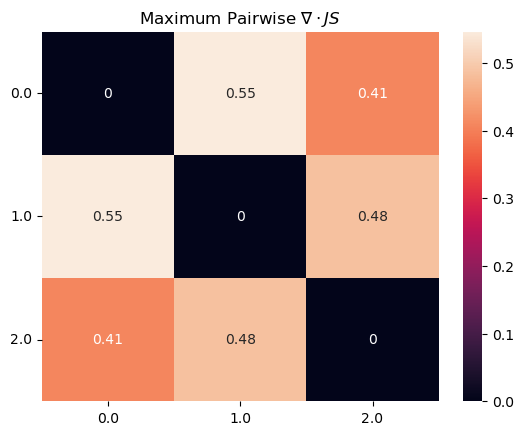

In [ ]:
from pychemauth.eda.screen import JSBinary

jsb = JSBinary(js_bins=5, robust=True)
jsb.fit(X=no_nan.drop('Y', axis=1).values, y=no_nan['Y'].values)
print(jsb.top_features())
_ = jsb.visualize()

However, the number of bins used to create the histograms is a hyperparameter that should be tuned.
We can plot the divergence as a function of bins and look for an "elbow" to select the "best"

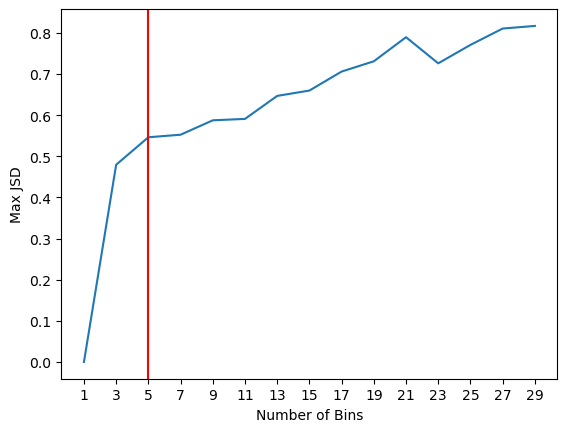

In [ ]:
bins = np.arange(1, 30, 2)

max_jsd_val = []
best_column = []
for nbins in bins:
    jsb = JSBinary(js_bins=nbins, robust=True)
    jsb.fit(X=no_nan.drop('Y', axis=1).values, y=no_nan['Y'].values)
    max_jsd_val.append(jsb.matrix[0,1])
    best_column.append(jsb.top_features()[0,1])

_ = plt.plot(bins, max_jsd_val)
_ = plt.xticks(bins)
_ = plt.ylabel('Max JSD')
_ = plt.xlabel('Number of Bins')
_ = plt.axvline(5, color='red')

In [ ]:
print(best_column) # Column 15 seems to occur frequently as the best single feature to separate the classes

[0, 15, 15, 15, 15, 15, 1, 15, 15, 3, 18, 17, 3, 17, 3]


/home/nam4/anaconda3/envs/oyster-provenance/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



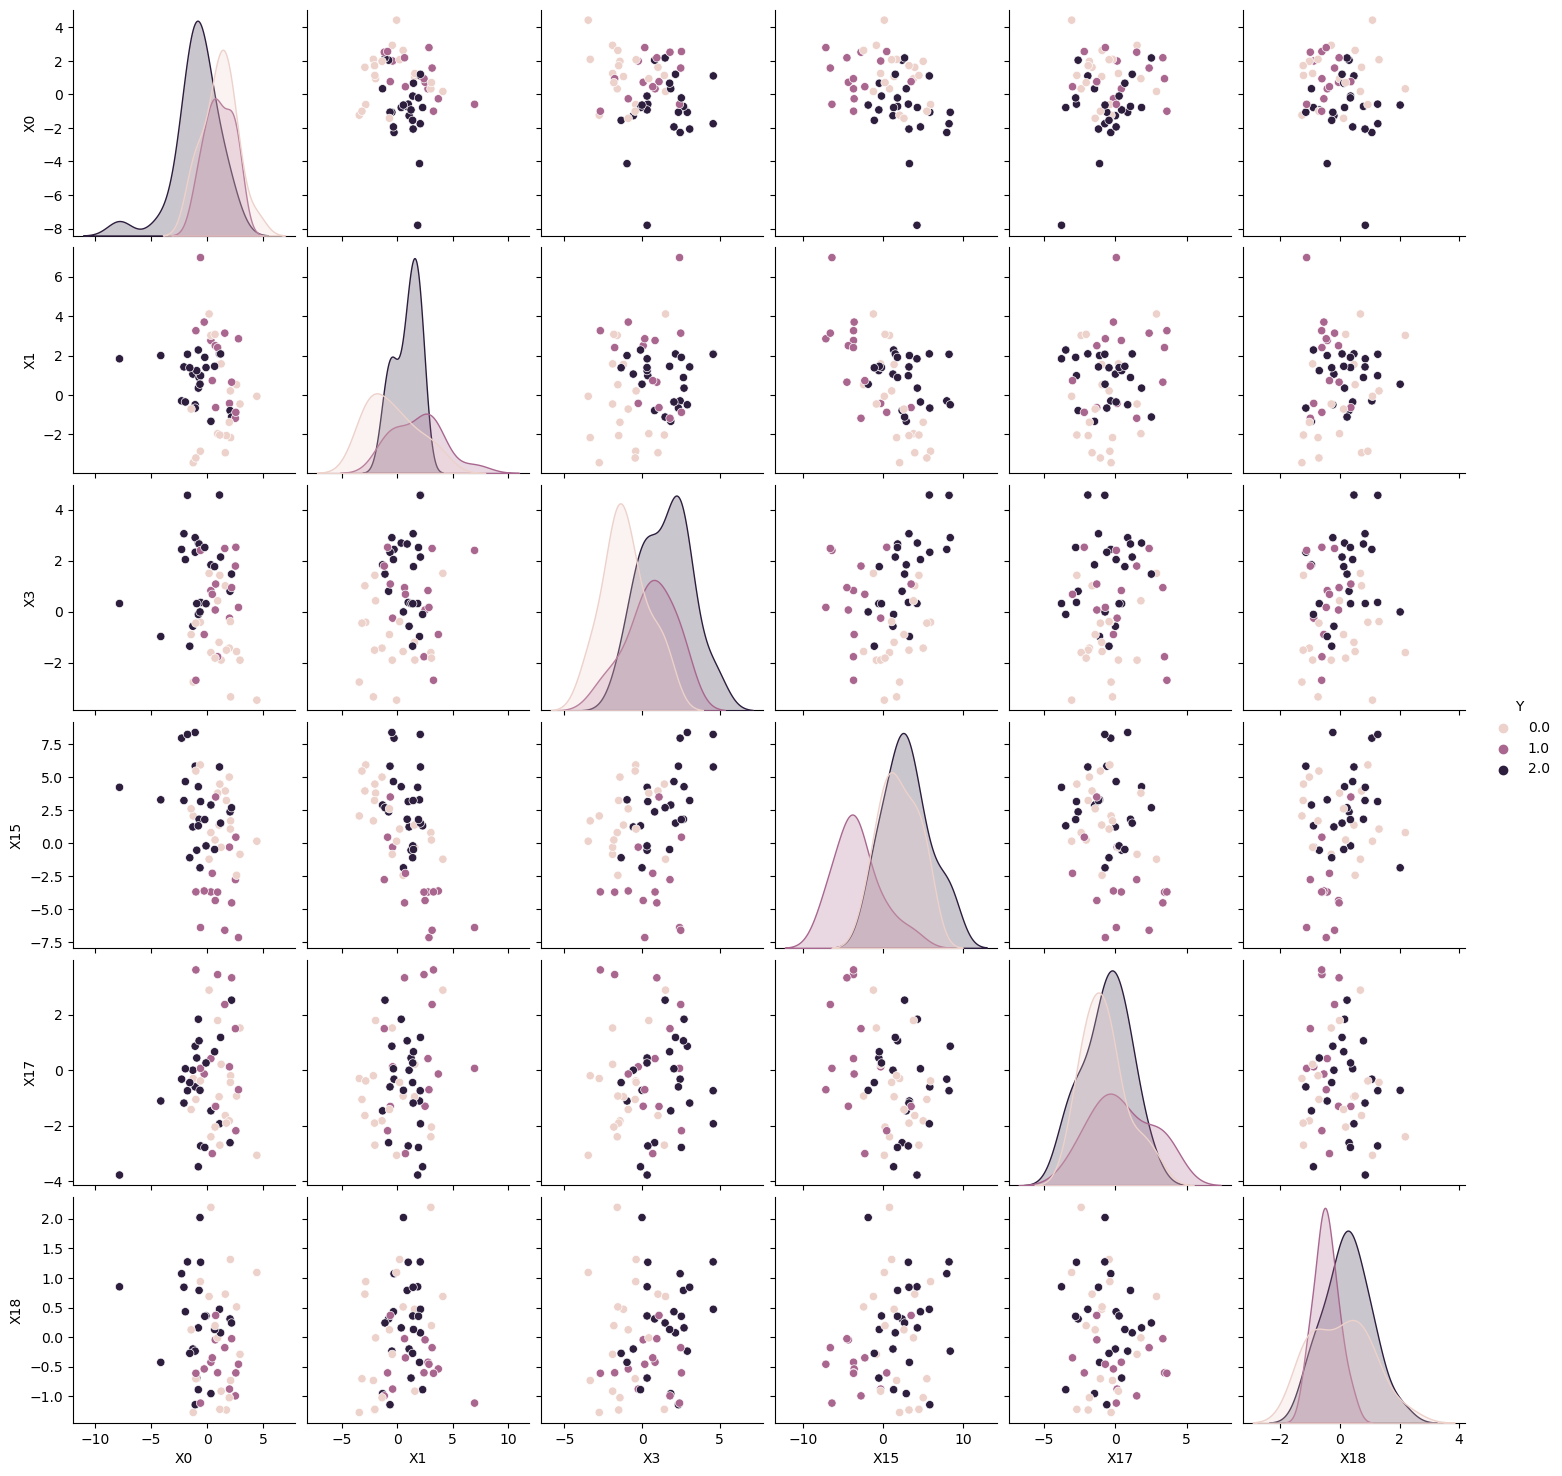

In [ ]:
# We can visualize just these top features
InspectData.pairplot(
    no_nan,
    vars=no_nan.drop('Y', axis=1).columns[np.unique(best_column)],
    hue="Y",
    diag_kind="kde",
)

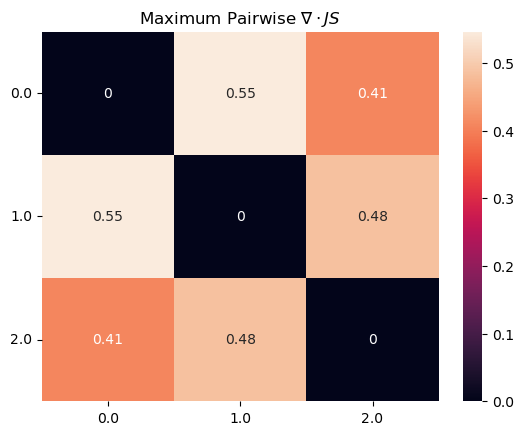

In [ ]:
from sklearn.preprocessing import PolynomialFeatures as PF

X_ = no_nan.drop('Y', axis=1).values
y_ = no_nan['Y'].values

ss = CorrectedScaler()
X_std = ss.fit_transform(X_)

pf = PF(degree=2)
X_std_poly = pf.fit_transform(X_std)

jsb = JSBinary(js_bins=5)
_ = jsb.fit(X_, y_)
_ = jsb.visualize()

In [ ]:
print(jsb.top_features()) # Here, polynomial feature engineering does not produce features that are better

[[None 15 3]
 [15 None 15]
 [3 15 None]]


<h3>Examining Multicollinearity</h3>

Collinear features can cause confusion in models and explanation tools alike.  It is usually best to try to decorrelate your features as much as possible before modeling.

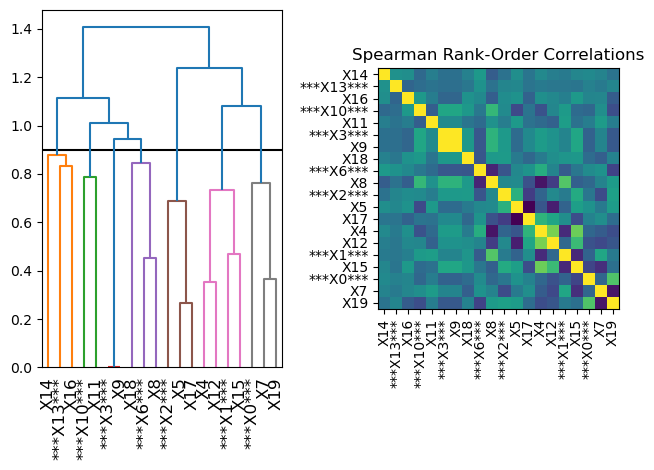

In [ ]:
selected_features, cluster_id_to_feature_ids, _ = InspectData.cluster_collinear(
    X=no_nan.drop('Y', axis=1).values,
    feature_names=no_nan.columns[1:],
    t=0.9,
    figsize=None
)

In [ ]:
# The high degree of correlation between X3 and X9 reveals that we created this synthetic data with n_repeated = 1
# which created a pair of duplicate columns.  One should definitely be removed!
no_nan[['X3', 'X9']].head(5)

,X3,X9
0,-0.250928,-0.250928
3,-0.569472,-0.569472
4,0.833365,0.833365
5,2.698298,2.698298
7,2.447761,2.447761


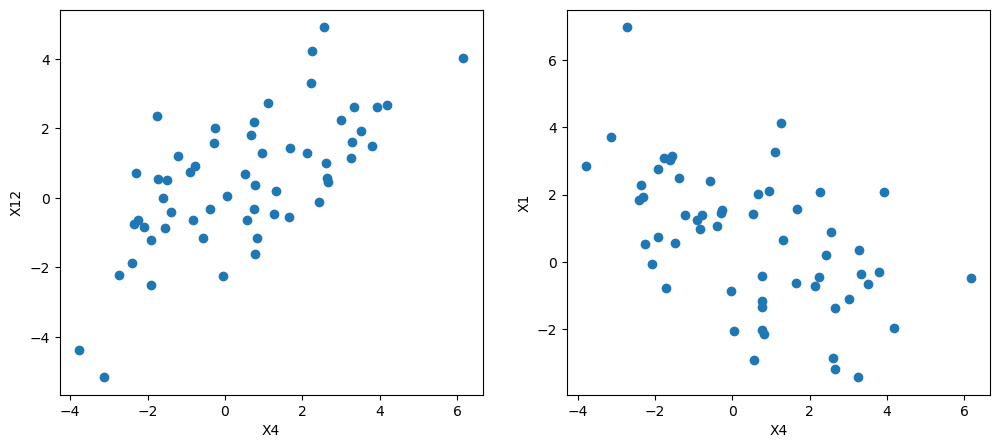

In [ ]:
# Things like X4 and X12 are also highly correlated and are essentially redundant.
# Similarly, X4 and X1 are anticorrelated and we could probably just use one of them in a future model.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0].plot(no_nan['X4'], no_nan['X12'], 'o')
axes[0].set_xlabel('X4')
axes[0].set_ylabel('X12')

axes[1].plot(no_nan['X4'], no_nan['X1'], 'o')
axes[1].set_xlabel('X4')
_ = axes[1].set_ylabel('X1')

In [ ]:
# Depending on the value of t we can select a different number of features.
# This value of t corresponds to 7 clusters.
selected_features

array(['X0', 'X1', 'X2', 'X3', 'X6', 'X10', 'X13'], dtype='<U3')

In [ ]:
# This lists which clusters contain which features.  Features in the same cluster might be considered to have similar
# information.
cluster_id_to_feature_ids

defaultdict(list,
            {7: ['X0', 'X7', 'X19'],
             6: ['X1', 'X4', 'X12', 'X15'],
             5: ['X2', 'X5', 'X17'],
             3: ['X3', 'X9'],
             4: ['X6', 'X8', 'X18'],
             2: ['X10', 'X11'],
             1: ['X13', 'X14', 'X16']})

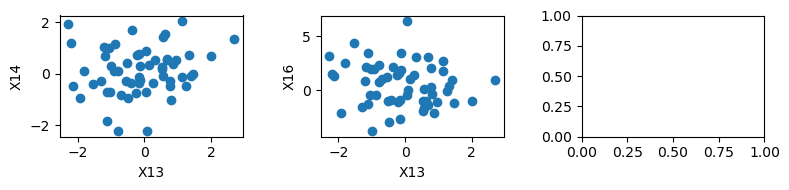

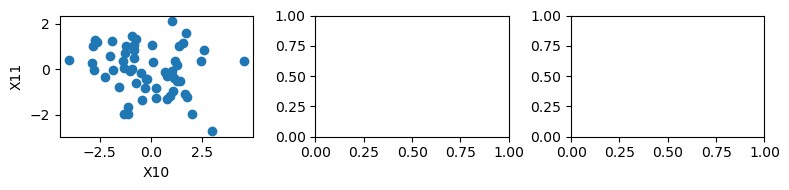

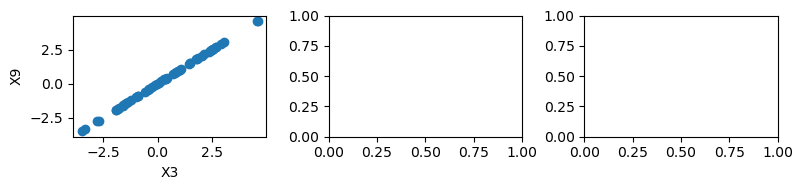

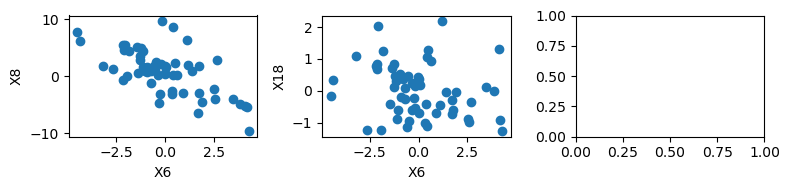

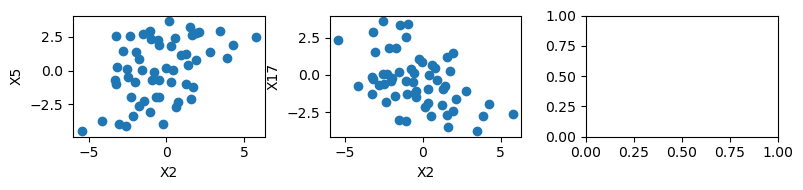

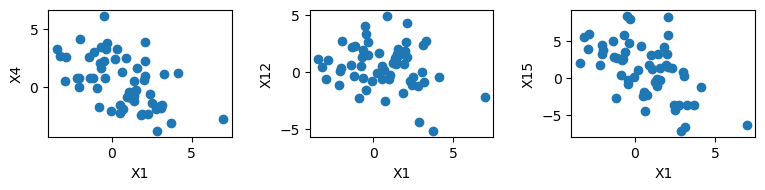

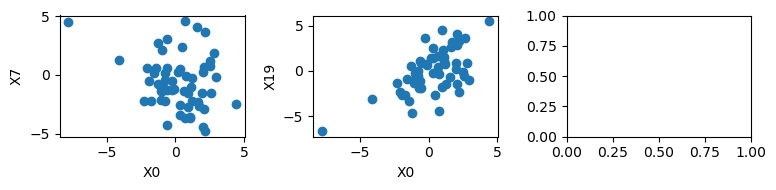

In [ ]:
for cluster_id in sorted(cluster_id_to_feature_ids.keys()):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8,2))
    for ax, id_ in zip(axes.flatten(), cluster_id_to_feature_ids[cluster_id][1:]):
        ax.plot(
            no_nan[cluster_id_to_feature_ids[cluster_id][0]],
            no_nan[id_],
            'o'
        )
        ax.set_xlabel(cluster_id_to_feature_ids[cluster_id][0])
        ax.set_ylabel(id_)
    plt.tight_layout()

Once a certain set of clusters has been determined, we need to select 1 member of each cluster.  A default selection
is made above, but we can also try to use some information about those features to make a more consistent choice.
For example, perhaps certain features are chemicals that can be measured on the same instrument, and building a model
which uses only measurements that can be made on a single device is advantageous.

Monte Carlo can be used to stochastically search for a set of features which have as many of the same categories as possible.
This is done by using a `lookup` function which takes the feature name and returns a category. In the example below
we are just returning of the feature name is odd or even ('X1' vs 'X2'), but the user can customize this.

In [ ]:
def lookup(feature_name):
    """Categorize a feature based on its index being odd or even."""
    if int(feature_name.split('X')[1])%2 == 0:
        return 'EVEN NUMBER'
    else:
        return 'ODD NUMBER'

best_choices = InspectData.minimize_cluster_label_entropy(
    cluster_id_to_feature_ids,
    lookup,
    X=no_nan.drop('Y', axis=1),
    seed=0,
    n_restarts=10,
    max_iters=1000,
    T=0.25
)

MC Steps: 100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 10440.40it/s]

MC Steps: 100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 12597.17it/s]

MC Steps: 100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 12834.47it/s]

MC Steps: 100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 12765.83it/s]

MC Steps: 100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 13016.77it/s]

Restarts: 100%|█████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.86it/s]


In [ ]:
best_choices # Here, all odd features have been selected except X18, which belongs to a cluster with only even numbers

['X13', 'X11', 'X9', 'X18', 'X5', 'X15', 'X7']

In [ ]:
cluster_id_to_feature_ids

defaultdict(list,
            {7: ['X0', 'X7', 'X19'],
             6: ['X1', 'X4', 'X12', 'X15'],
             5: ['X2', 'X5', 'X17'],
             3: ['X3', 'X9'],
             4: ['X6', 'X8', 'X18'],
             2: ['X10', 'X11'],
             1: ['X13', 'X14', 'X16']})

<h3>Interactive Exploration</h3>

For EDA it can be helpful to examine correlations interactively; this amounts to moving the value of $t$ up and down.  For elemental data we have included a tool to color the elements based on this value.  All columns that are not labeled with recognized elements are ignored, but the remainder are used in the visualization below.

For this example, we will assign elements to each column.

In [ ]:
elemental = no_nan.drop('Y', axis=1).rename(
    {
        'X0': 'H',
        'X1': 'He',
        'X2': 'Li',
        'X3': 'Be',
        'X4': 'Ba',
        'X5': 'Sr',
        'X6': 'Cd',
        'X7': 'Cs',
        'X8': 'P',
        'X9': 'K',
        'X10': 'Ca',
        'X11': 'Na',
        'X12': 'B',
        'X13': 'S',
        'X14': 'Ni',
        'X15': 'Mo',
        'X16': 'Mg',
        'X17': 'Mn',
        'X18': 'N',
        'X19': 'O'
    },
    axis=1
)

In [ ]:
InspectData.cluster_periodic_table(elemental, step=0.1)#, notebook_url='http://XXX.X.XXX.XXX:8888')